# Data Science and Business Analytics Internship
## AUTHOR : Umang Joshi
## TASK 2 : Prediction using Unsupervised ML
## GRIP@SPARK FOUNDATION

### 1. Importing important Libraries

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 2. Reading Data from source

In [260]:
iris_data=pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 3. Data pre-processing

In [261]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [262]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [263]:
iris_data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### 4. Data Cleaning

In [264]:
data=iris_data.drop(['Id'],axis='columns')

### 5. Visualizing (Petal)Length vs (Petal)Width & (Sepal)length vs (Sepal)Width

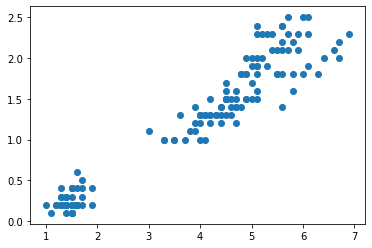

In [265]:
plt.scatter(data[['PetalLengthCm']],data['PetalWidthCm'])

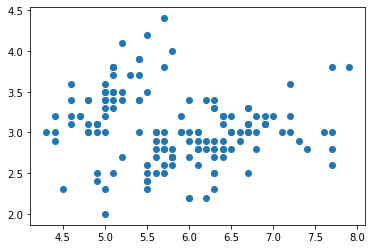

In [266]:
plt.scatter(data[['SepalLengthCm']],data['SepalWidthCm'])

### 6. Understanding data point distribution using seaborn

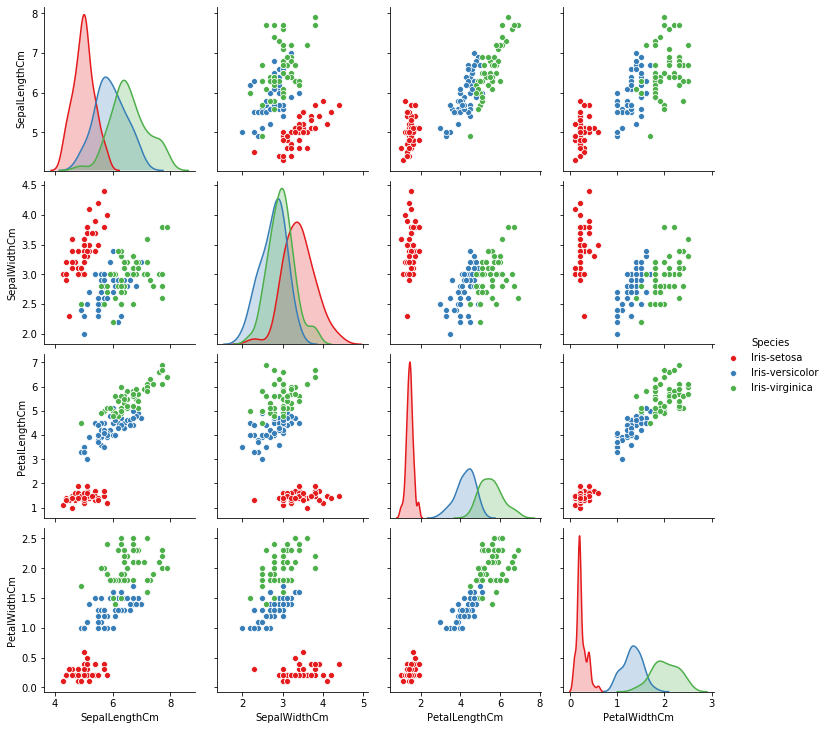

In [267]:
sns.pairplot(data,hue='Species',palette='Set1')
plt.show()

In [268]:
km_data=data.drop(['Species'],axis='columns')

### 7. Training KMeans algorithm for different value of 'K' and finding the k value (No. of clusters) using Elbow Method

In [269]:
from sklearn.cluster import KMeans

In [270]:
lst=[]
for i in range(1,11):
    KM=KMeans(n_clusters=i)
    KM.fit(km_data)
    lst.append(KM.inertia_)

Text(0, 0.5, 'lst value')

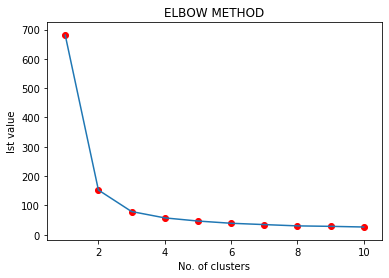

In [271]:
plt.plot(range(1,11),lst)
plt.scatter(range(1,11),lst,color='red')
plt.title('ELBOW METHOD')
plt.xlabel('No. of clusters')
plt.ylabel('lst value')

##### Since the graph is bending at 3 so value of K=3

### 8.Visualizing for different values of 'K'

In [272]:
X = data[['PetalLengthCm']]
Y = data['PetalWidthCm']

In [273]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


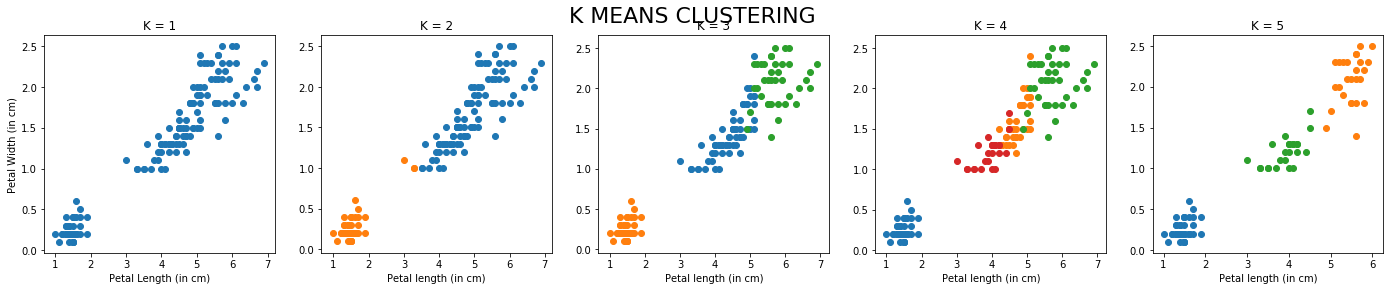

In [274]:
plt.figure(figsize=(24,4))
plt.suptitle('K MEANS CLUSTERING',fontsize=22)
plt.subplot(1,5,1)
plt.title('K = 1')
plt.xlabel('Petal Length (in cm)')
plt.ylabel('Petal Width (in cm)')
plt.scatter(X,Y)

plt.subplot(1,5,2)
plt.title('K = 2')
plt.xlabel('Petal length (in cm)')
KM2 = KMeans(n_clusters=2)
data['label']=KM2.fit_predict(data.drop(['Species'],axis='columns'))
plt.scatter(data.PetalLengthCm[data.label==0],data.PetalWidthCm[data.label==0])
plt.scatter(data.PetalLengthCm[data.label==1],data.PetalWidthCm[data.label==1])

plt.subplot(1,5,3)
plt.title('K = 3')
plt.xlabel('Petal length (in cm)')
KM3=KMeans(n_clusters=3)
data['label3']= KM3.fit_predict(data.drop(['Species'],axis='columns'))
plt.scatter(data.PetalLengthCm[data.label3==0],data.PetalWidthCm[data.label3==0])
plt.scatter(data.PetalLengthCm[data.label3==1],data.PetalWidthCm[data.label3==1])
plt.scatter(data.PetalLengthCm[data.label3==2],data.PetalWidthCm[data.label3==2])

plt.subplot(1,5,4)
plt.title('K = 4')
plt.xlabel('Petal length (in cm)')
KM4=KMeans(n_clusters=4)
data['label4']= KM4.fit_predict(data.drop(['Species'],axis='columns'))
plt.scatter(data.PetalLengthCm[data.label4==0],data.PetalWidthCm[data.label4==0])
plt.scatter(data.PetalLengthCm[data.label4==1],data.PetalWidthCm[data.label4==1])
plt.scatter(data.PetalLengthCm[data.label4==2],data.PetalWidthCm[data.label4==2])
plt.scatter(data.PetalLengthCm[data.label4==3],data.PetalWidthCm[data.label4==3])

plt.subplot(1,5,5)
plt.title('K = 5')
plt.xlabel('Petal length (in cm)')
KM5=KMeans(n_clusters=5)
data['label5']= KM5.fit_predict(data.drop(['Species'],axis='columns'))
plt.scatter(data.PetalLengthCm[data.label5==1],data.PetalWidthCm[data.label5==1])
plt.scatter(data.PetalLengthCm[data.label5==2],data.PetalWidthCm[data.label5==2])
plt.scatter(data.PetalLengthCm[data.label5==3],data.PetalWidthCm[data.label5==3])



In [275]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [276]:
fdata=data.drop(['label','label3','label4','label5'],axis='columns')
fdata.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 9. Training KMeans with the data for K=3

In [277]:
k_data=fdata
kmeans=KMeans(n_clusters=3)
ylabel=kmeans.fit_predict(k_data.drop(['Species'],axis='columns'))
k_data['label']=ylabel
k_data


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


In [278]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

### 10. Visualizing cluster for Sepal Length and Sepal Width

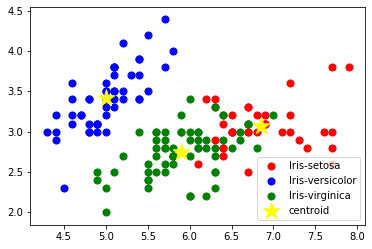

In [279]:
plt.scatter(k_data.SepalLengthCm[k_data.label==0],k_data.SepalWidthCm[k_data.label==0],s=50,c='red',label='Iris-setosa')
plt.scatter(k_data.SepalLengthCm[k_data.label==1],k_data.SepalWidthCm[k_data.label==1],s=50,c='blue',label='Iris-versicolor')
plt.scatter(k_data.SepalLengthCm[k_data.label==2],k_data.SepalWidthCm[k_data.label==2],s=50,c='green',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroid',marker='*')
plt.legend()